In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
sns.set(rc={"figure.dpi":300})
sns.set_style('ticks')

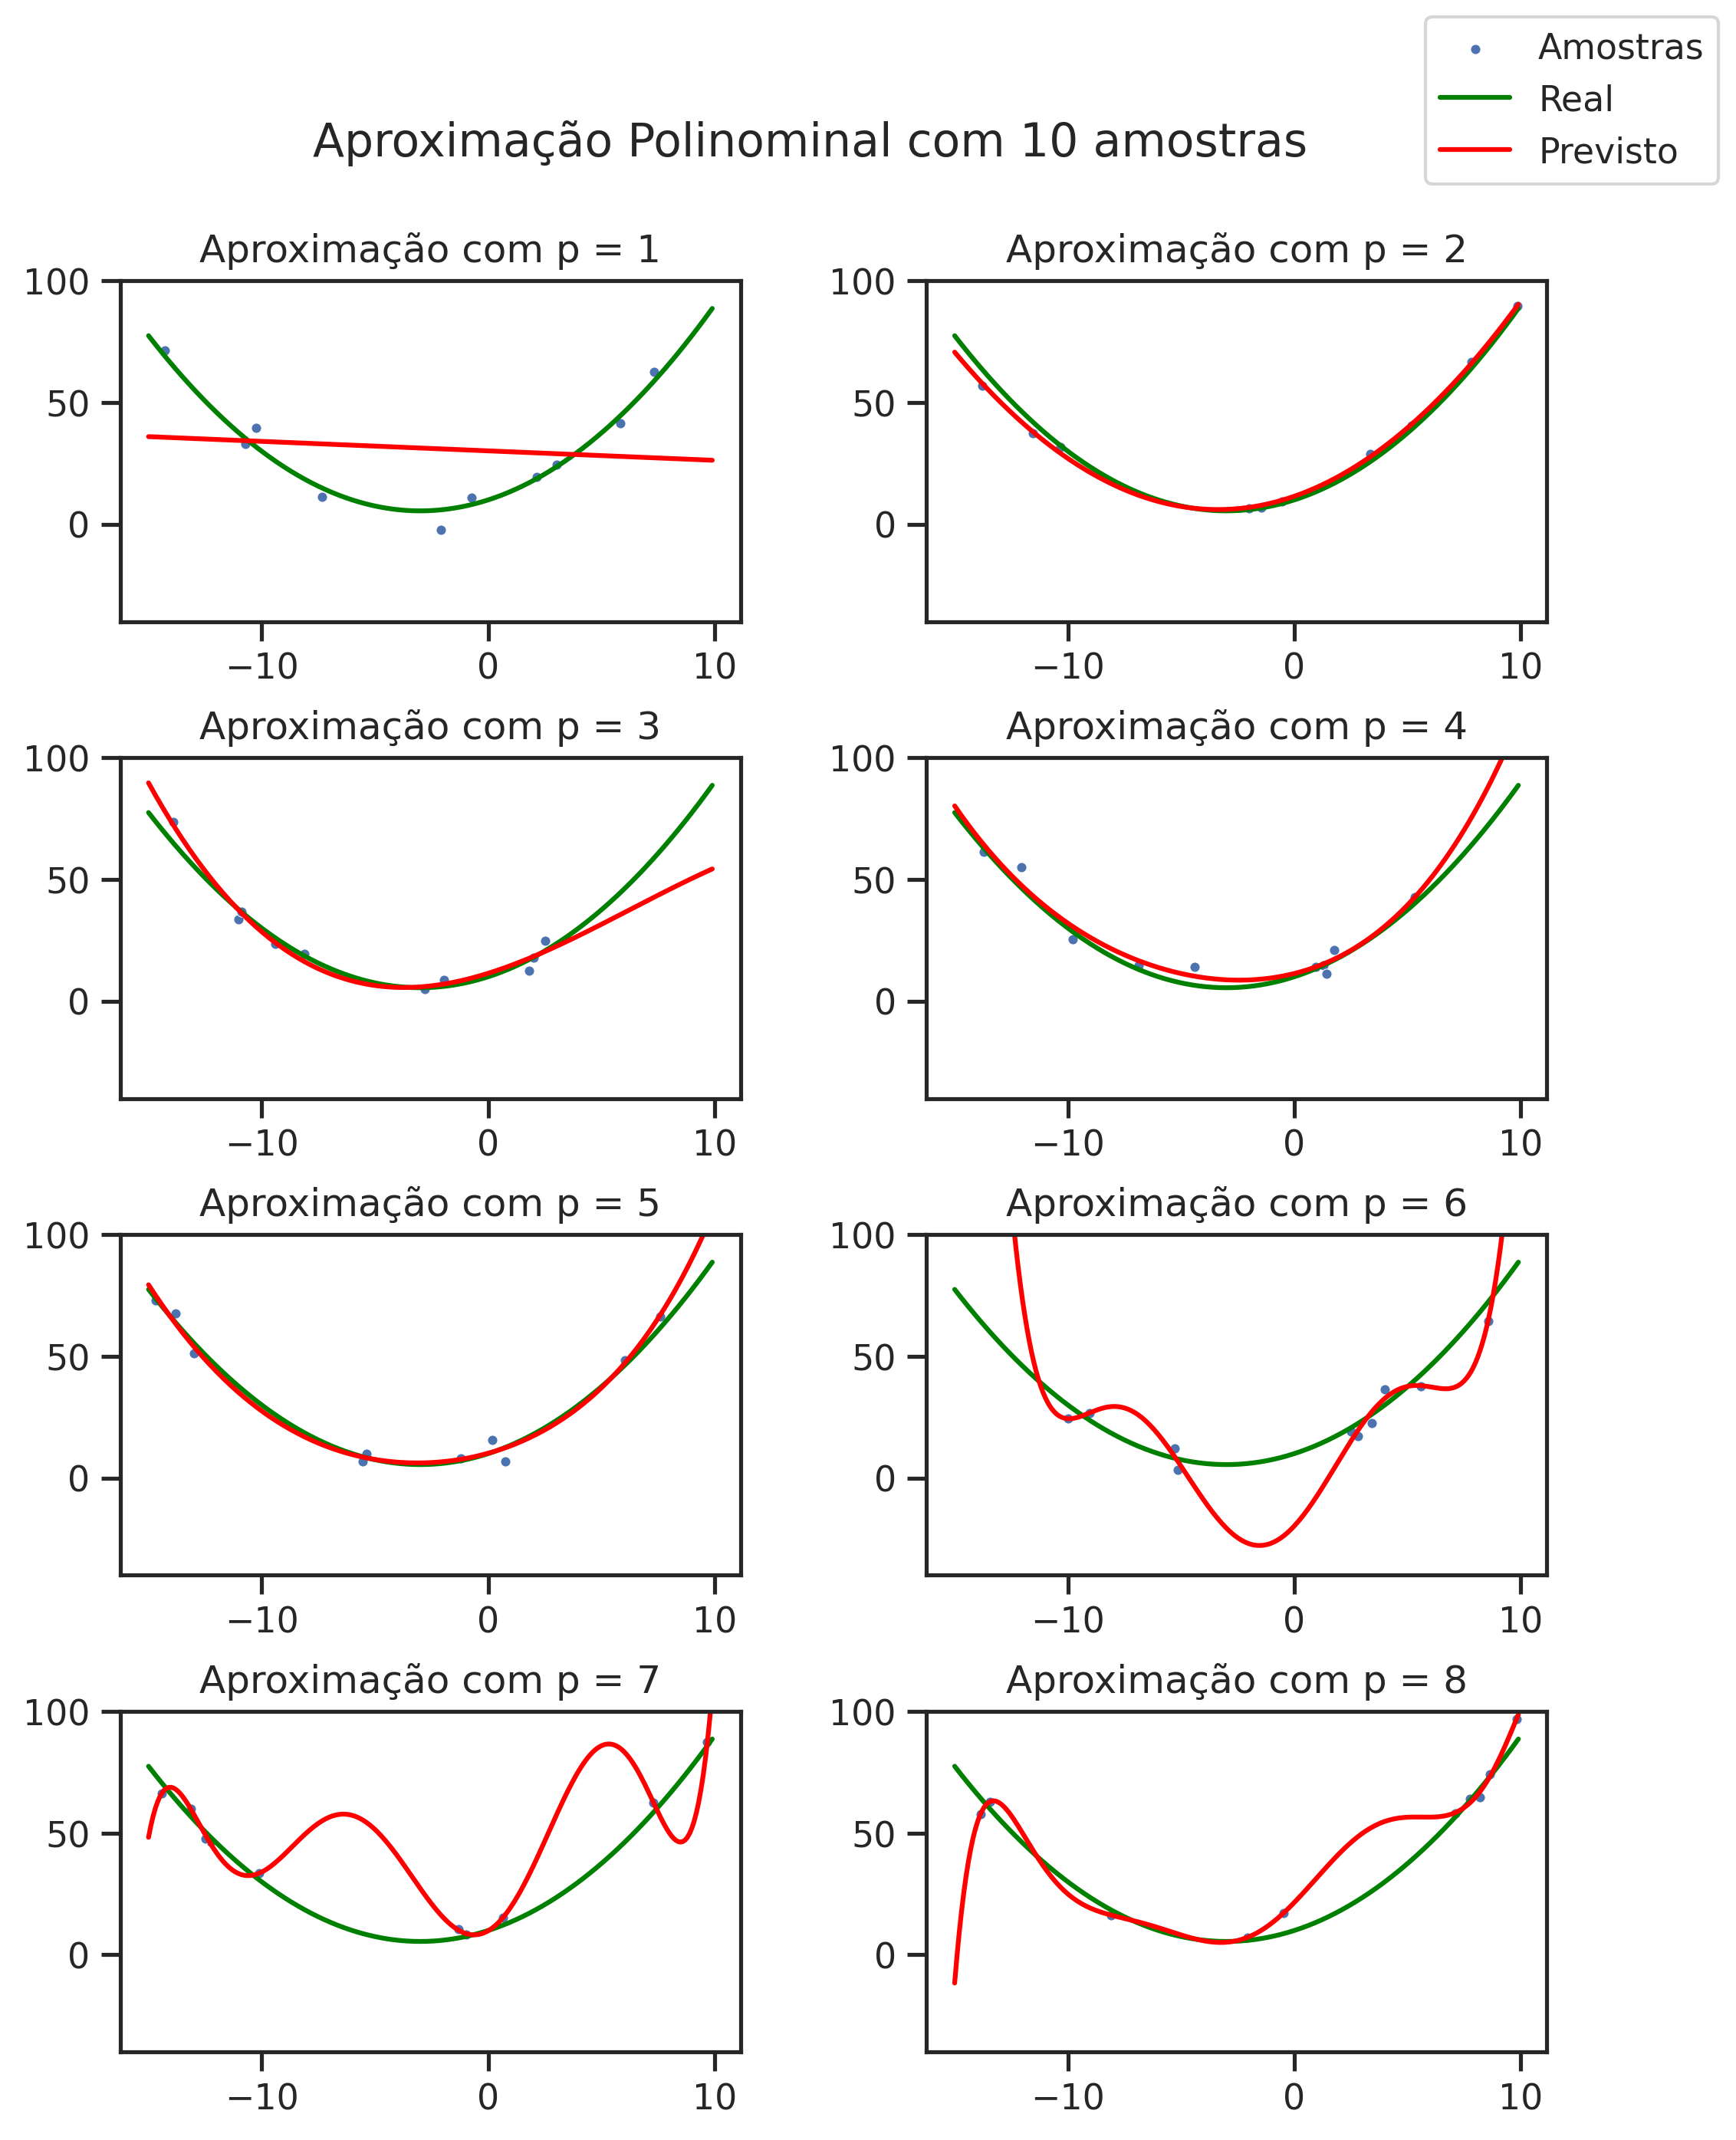

In [2]:
np.random.seed(101)

def f(x):
    return 0.5 * x**2 + 3 * x + 10

xmin, xmax = -15, 10
amostras = 10

fig, axs = plt.subplots(4,2, figsize = (8, 10))
fig.subplots_adjust(wspace = 0.3, hspace = 0.4)
fig.suptitle(f'Aproximação Polinominal com {amostras} amostras', y = 0.95)
for p in range(1, 9):
    X = np.random.uniform(xmin, xmax, amostras)
    Y = f(X) + np.random.normal(0, 4, amostras)
    H = np.column_stack([X**i for i in range(p, -1, -1)])
    w = np.linalg.pinv(H).dot(Y)
    xgrid = np.arange(xmin, xmax, 0.1)
    ygrid = f(xgrid)
    Hgrid = np.column_stack([xgrid**i for i in range(p, -1, -1)])
    yhatgrid = Hgrid.dot(w)

    ax = axs[(p-1)//2, (p-1)%2]
    sns.scatterplot(x = X, y = Y, label = 'Amostras',  ax = ax, s = 10)
    sns.lineplot(x = xgrid, y = ygrid, label = 'Real', ax = ax, color = 'green')
    sns.lineplot(x = xgrid, y = yhatgrid, label = 'Previsto', ax = ax, color = 'red')
    ax.set_title(f'Aproximação com p = {p}')
    ax.get_legend().remove()
    ax.set_ylim(-40, 100)

handles, _ = ax.get_legend_handles_labels()
fig.legend(handles=handles, labels=['Amostras', 'Real', 'Previsto'], loc='upper right')